<a href="https://colab.research.google.com/github/Zen0007/Logistic_Regression/blob/main/analysis_sms_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt

In [79]:
data = pd.read_csv('spamsms',sep='\t',header=None,names=['Label','sms'])
data.head()

,Label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [72]:
data = data.drop(index=12)

In [73]:
data['Label'].value_counts()

ham     4825
spam     746
Name: Label, dtype: int64

In [74]:
from sklearn.preprocessing import LabelBinarizer
x= data['sms'].values
y = data['Label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['ham', 'spam'], dtype='<U4')

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x
                                                 ,y
                                                 ,test_size=0.25
                                                 ,random_state=0)

print(x_train,'\t')
print(y_train)

["I'll text you when I drop x off"
 'Hi mate its RV did u hav a nice hol just a message 3 say hello coz haven\x92t sent u 1 in ages started driving so stay off roads!RVx'
 "network operator. The service is free. For T & C's visit 80488.biz" ...
 "I was at bugis juz now wat... But now i'm walking home oredi... Ü so late then reply... I oso saw a top dat i like but din buy... Where r ü now? "
 ":-) yeah! Lol. Luckily i didn't have a starring role like you!"
 'How dare you stupid. I wont tell anything to you. Hear after i wont talk to you:-.'] 	
[0 0 1 ... 0 0 0]


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(stop_words='english')

x_train_tfidf = vector.fit_transform(x_train)
x_test_tfidf = vector.transform(x_test)
print(x_train_tfidf)

  (0, 2294)	0.7309039984372743
  (0, 6270)	0.5076230894518599
  (0, 3828)	0.45617775496373547
  (1, 5395)	0.29680902811957594
  (1, 5334)	0.28288766798432613
  (1, 5956)	0.21607620767832617
  (1, 2291)	0.22999756781357597
  (1, 5946)	0.2213688631647173
  (1, 813)	0.26534882843302526
  (1, 5542)	0.1862911840621155
  (1, 3097)	0.21295275547190812
  (1, 1897)	0.22541286109303735
  (1, 3136)	0.19853736812702527
  (1, 5458)	0.1742516262900452
  (1, 4102)	0.1772830910370123
  (1, 3566)	0.12788493340131615
  (1, 3194)	0.28288766798432613
  (1, 4385)	0.1891540331297286
  (1, 3092)	0.2144789755658702
  (1, 2140)	0.16498412556477862
  (1, 5394)	0.29680902811957594
  (1, 4035)	0.24516758550689682
  (1, 3157)	0.16498412556477862
  (2, 1261)	0.4291697046033742
  (2, 606)	0.4487050549303325
  :	:
  (4175, 4588)	0.279826260963046
  (4175, 5457)	0.27758125250352883
  (4175, 2019)	0.25983482758365045
  (4175, 1433)	0.323529939922208
  (4175, 3570)	0.2734097099560346
  (4175, 1457)	0.24407820299948274
 

In [82]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_tfidf,y_train)
y_pred = model.predict(x_test_tfidf)
for pred, sms in zip(y_pred[:10],x_test[:10]):
  print(f'PRED:{pred}-SMS:{sms}\n')

PRED:0-SMS:If you want to mapquest it or something look up "usf dogwood drive", that's the tiny street where the parking lot is

PRED:0-SMS:Was the farm open?

PRED:0-SMS:I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones

PRED:0-SMS:Where are you call me.

PRED:0-SMS:In that case I guess I'll see you at campus lodge

PRED:0-SMS:How come u got nothing to do?

PRED:0-SMS:Our ride equally uneventful - not too many of those pesky cyclists around at that time of night ;).

PRED:0-SMS:Hey i will be late... i'm at amk. Need to drink tea or coffee

PRED:0-SMS:Hey are we going for the lo lesson or gym? 

PRED:1-SMS:85233 FREE>Ringtone!Reply REAL



In [83]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[1187,    2],
       [  52,  152]])

In [85]:
tn,fp,fn,tp = matrix.ravel()

print(f'TN:{tn}')
print(f'FT:{fp}')
print(f'FN:{fn}')
print(f'TP:{tp}')

TN:1187
FT:2
FN:52
TP:152


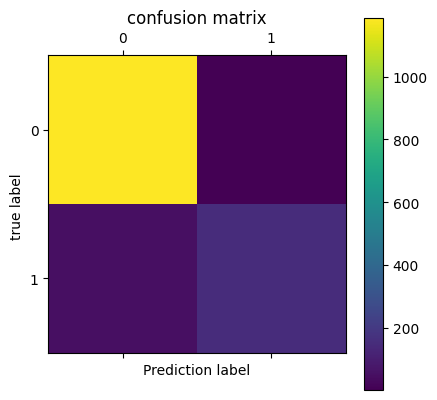

In [90]:
plt.matshow(matrix)
plt.colorbar()

plt.title('confusion matrix')
plt.ylabel('true label ')
plt.xlabel('Prediction label')
plt.show()

In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9612347451543432

In [95]:
from sklearn.metrics import precision_score 

precision_score(y_test,y_pred)

0.987012987012987

In [96]:
from sklearn.metrics import recall_score

recall_score(y_test,y_pred)

0.7450980392156863

In [97]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)

0.8491620111731845

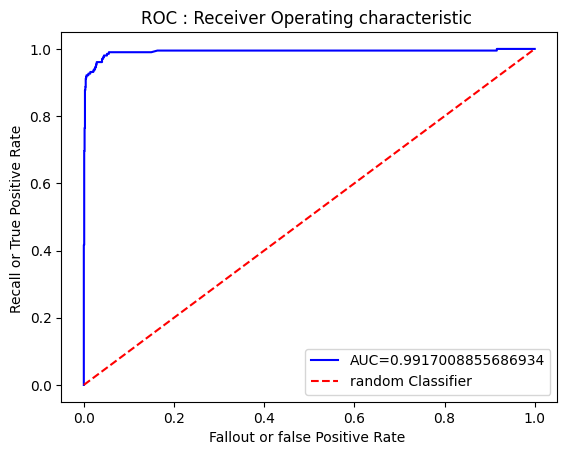

In [100]:
from sklearn .metrics import roc_curve,auc

prob_estimate = model.predict_proba(x_test_tfidf)
fpr , tpr ,threshhold = roc_curve(y_test,prob_estimate[:,1])
nilai_auc = auc(fpr,tpr)

plt.plot(fpr,tpr,'b',label=f'AUC={nilai_auc}')
plt.plot([0,1],[0,1],'r--',label='random Classifier')

plt.title('ROC : Receiver Operating characteristic ')
plt.xlabel('Fallout or false Positive Rate ')
plt.ylabel('Recall or True Positive Rate ')
plt.legend()
plt.show()